In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Shift-JIS エンコーディングでCSVファイルを読み込む
data_shiftjis = pd.read_csv("../data/#統合データ_所在管理LTデータ9月（土日削除）.csv", encoding="shift-jis")
# 最初の5行を表示してデータの概要を確認
data_shiftjis.head()

,かんばんシリアル,伝票番号,拠点所番地,品番,品名,収容数,仕入先名,仕入先工場名,ステータス,納入日,...,基準在庫日数,検収入庫LT/設計値_検収入庫LT,入庫出庫LT/設計値_入庫出庫LT,出庫回収LT/設計値_出庫回収LT,出庫回収LT（基準在庫枚数込み）/設計値_出庫回収LT,社内LT（検収〜回収LT）/設計値_社内LT（検収〜回収LT）,検収日時（HHMM）,検収日時（HH:MM）,納入予定時間（HHMM）,検収時間と納入予定時間の差分（HHMM）
0,1Z23J00091508,XCGP130,20488,G1144ECE010,"ﾀｰﾐﾅﾙ,ﾓｰﾀｰｹｰﾌﾞﾙ",8,矢崎総業（株）,< NULL >,回収済,2023/9/29 0:00,...,0.58,1.400000,0.571429,1.000000,0.773646,0.898423,1805,18:05,900,905
1,1Z23J00068574,XCGL830,20488,G1144ECE010,"ﾀｰﾐﾅﾙ,ﾓｰﾀｰｹｰﾌﾞﾙ",8,矢崎総業（株）,< NULL >,回収済,2023/9/28 0:00,...,0.58,1.200000,5.571429,0.636364,0.492320,3.054638,1015,10:15,900,115
2,1Z23J00066432,XCGL630,30357,35847ECE010,ﾁｭｰﾌﾞT/Aﾙｰﾌﾞｱﾌﾟﾗｲ,40,（株）メタルテック,< NULL >,回収済,2023/9/28 0:00,...,0.50,1.181818,5.896552,1.454545,0.840072,3.445545,713,7:13,600,113
3,1Z23J00065428,XCGL830,20488,G1144ECE010,"ﾀｰﾐﾅﾙ,ﾓｰﾀｰｹｰﾌﾞﾙ",8,矢崎総業（株）,< NULL >,回収済,2023/9/28 0:00,...,0.58,1.200000,5.464286,0.909091,0.703314,3.054638,1015,10:15,900,115
4,1Z23J00063618,XCGJ670,30358,35847ECE020,ﾁｭｰﾌﾞT/Aﾙｰﾌﾞｱﾌﾟﾗｲ,60,（株）メタルテック,< NULL >,回収済,2023/9/27 0:00,...,0.49,2.900000,8.896552,1.272727,0.606876,4.928854,704,7:04,600,104


In [5]:
import datetime

# 時間帯を指定してデータをフィルタリングする関数
def filter_by_time(data, column, start_time, end_time):
    # 時間帯を跨ぐ場合（例: 18:10〜0:20のような場合）
    if start_time > end_time:
        return data[(data[column] >= start_time) | (data[column] <= end_time)]
    # 通常の時間帯
    else:
        return data[(data[column] >= start_time) & (data[column] <= end_time)]

# 日付と時間の文字列からHHMM形式に変換する関数
def convert_datetime_to_HHMM(datetime_str):
    dt = datetime.datetime.strptime(datetime_str, '%Y/%m/%d %H:%M')
    return dt.hour * 100 + dt.minute

# 「順立装置入庫日時」のカラムをHHMM形式に変換
data_shiftjis["順立装置入庫日時（HHMM）"] = data_shiftjis["順立装置入庫日時"].dropna().apply(lambda x: convert_datetime_to_HHMM(x))

# パターン①の条件に基づいてデータをフィルタリング
filtered_data_1 = filter_by_time(data_shiftjis, "検収日時（HHMM）", 520, 920)
within_range_1 = filter_by_time(filtered_data_1, "順立装置入庫日時（HHMM）", 1020, 1650).shape[0]
outside_range_1 = filtered_data_1.shape[0] - within_range_1

# 割合を計算
within_percentage_1 = within_range_1 / filtered_data_1.shape[0] * 100
outside_percentage_1 = outside_range_1 / filtered_data_1.shape[0] * 100

within_percentage_1, outside_percentage_1

# パターン②の条件に基づいてデータをフィルタリング
filtered_data_2 = filter_by_time(data_shiftjis, "検収日時（HHMM）", 950, 1350)
within_range_2 = filter_by_time(filtered_data_2, "順立装置入庫日時（HHMM）", 1450, 2010).shape[0]
outside_range_2 = filtered_data_2.shape[0] - within_range_2

# 割合を計算
within_percentage_2 = within_range_2 / filtered_data_2.shape[0] * 100
outside_percentage_2 = outside_range_2 / filtered_data_2.shape[0] * 100

within_percentage_2, outside_percentage_2

# パターン③の条件に基づいてデータをフィルタリング
filtered_data_3 = filter_by_time(data_shiftjis, "検収日時（HHMM）", 1310, 1710)
within_range_3 = filter_by_time(filtered_data_3, "順立装置入庫日時（HHMM）", 1810, 20).shape[0]
outside_range_3 = filtered_data_3.shape[0] - within_range_3

# 割合を計算
within_percentage_3 = within_range_3 / filtered_data_3.shape[0] * 100
outside_percentage_3 = outside_range_3 / filtered_data_3.shape[0] * 100

within_percentage_3, outside_percentage_3

# パターン④の条件に基づいてデータをフィルタリング
filtered_data_4 = filter_by_time(data_shiftjis, "検収日時（HHMM）", 1720, 2120)
within_range_4 = filter_by_time(filtered_data_4, "順立装置入庫日時（HHMM）", 2220, 450).shape[0]
outside_range_4 = filtered_data_4.shape[0] - within_range_4

# 割合を計算
within_percentage_4 = within_range_4 / filtered_data_4.shape[0] * 100
outside_percentage_4 = outside_range_4 / filtered_data_4.shape[0] * 100

within_percentage_4, outside_percentage_4

# パターン⑤の条件に基づいてデータをフィルタリング
filtered_data_5 = filter_by_time(data_shiftjis, "検収日時（HHMM）", 2150, 150)
within_range_5 = filter_by_time(filtered_data_5, "順立装置入庫日時（HHMM）", 250, 820).shape[0]
outside_range_5 = filtered_data_5.shape[0] - within_range_5

# 割合を計算
within_percentage_5 = within_range_5 / filtered_data_5.shape[0] * 100
outside_percentage_5 = outside_range_5 / filtered_data_5.shape[0] * 100

within_percentage_5, outside_percentage_5

# パターン⑥の条件に基づいてデータをフィルタリング
filtered_data_6 = filter_by_time(data_shiftjis, "検収日時（HHMM）", 120, 520)
within_range_6 = filter_by_time(filtered_data_6, "順立装置入庫日時（HHMM）", 620, 1220).shape[0]
outside_range_6 = filtered_data_6.shape[0] - within_range_6

# 割合を計算
within_percentage_6 = within_range_6 / filtered_data_6.shape[0] * 100
outside_percentage_6 = outside_range_6 / filtered_data_6.shape[0] * 100

within_percentage_6, outside_percentage_6


(53.825136612021865, 46.17486338797814)

In [7]:
# 時間差（検収入庫LT）を計算する関数
def calculate_LT(row):
    # HHMM形式の時間を分に変換
    reception_time = row["検収日時（HHMM）"]
    storage_time = row["順立装置入庫日時（HHMM）"]
    reception_minutes = (reception_time // 100) * 60 + (reception_time % 100)
    storage_minutes = (storage_time // 100) * 60 + (storage_time % 100)
    
    # 時間差を計算
    lt = storage_minutes - reception_minutes
    # 時間差が負の場合、24時間を加算（翌日として扱う）
    if lt < 0:
        lt += 24 * 60
    return lt

# 検収入庫LTを計算
data_shiftjis["検収入庫LT"] = data_shiftjis.apply(calculate_LT, axis=1)

# 各パターンごとの中央値を計算
medians = []
patterns = [
    (520, 920, 1020, 1650),
    (950, 1350, 1450, 2010),
    (1310, 1710, 1810, 20),
    (1720, 2120, 2220, 450),
    (2150, 150, 250, 820),
    (120, 520, 620, 1220)
]

for p in patterns:
    filtered_data = filter_by_time(data_shiftjis, "検収日時（HHMM）", p[0], p[1])
    median = filtered_data["検収入庫LT"].median()
    medians.append(median)

medians


[314.0, 584.0, 582.0, 419.0, 308.0, 213.0]

In [33]:
# 各パターンごとに「検収入庫LT/設計値_検収入庫LT」の中央値を再計算
medians2 = []

for p in patterns:
    filtered_data = filter_by_time(data_shiftjis, "検収日時（HHMM）", p[0], p[1])
    median = (filtered_data["検収入庫LT/設計値_検収入庫LT"].median()-1)*100
    medians2.append(median)

medians2

[-3.846153799999996, 25.0, 50.0, 21.739130399999993, -20.8333333, -47.7272727]

In [34]:
# 計算結果をテーブルデータとしてまとめる
results = pd.DataFrame({
    'パターン': ['①', '②', '③', '④', '⑤', '⑥'],
    '検収日時範囲': ['5:20〜9:20（4時間）', '9:50〜13:50（4時間）', '13:10〜17:10（4時間）', '17:20〜21:20（4時間）', '21:50〜1:50（4時間）', '1:20〜5:20（4時間）'],
    '入庫日時範囲': ['10:20〜16:50（6時間30分）', '14:50〜20:10（5時間20分）', '18:10〜0:20（4時間10分）', '22:20〜4:50（7時間30分）', '2:50〜8:20（5時間30分）', '6:20〜12:20（6時間）'],
    '入庫日時範囲内の割合(%)': [within_percentage_1, within_percentage_2, within_percentage_3, within_percentage_4, within_percentage_5, within_percentage_6],
    '入庫日時範囲外の割合(%)': [outside_percentage_1, outside_percentage_2, outside_percentage_3, outside_percentage_4, outside_percentage_5, outside_percentage_6],
    '検収〜入庫LT（分）': [medians[0],medians[1],medians[2],medians[3],medians[4],medians[5]],
    '検収〜入庫LTの設計値オーバー率': [medians2[0],medians2[1],medians2[2],medians2[3],medians2[4],medians2[5]]
})

results


,パターン,検収日時範囲,入庫日時範囲,入庫日時範囲内の割合(%),入庫日時範囲外の割合(%),検収〜入庫LT（分）,検収〜入庫LTの設計値オーバー率
0,①,5:20〜9:20（4時間）,10:20〜16:50（6時間30分）,57.235495,42.764505,314.0,-3.846154
1,②,9:50〜13:50（4時間）,14:50〜20:10（5時間20分）,35.690406,64.309594,584.0,25.000000
2,③,13:10〜17:10（4時間）,18:10〜0:20（4時間10分）,43.312802,56.687198,582.0,50.000000
3,④,17:20〜21:20（4時間）,22:20〜4:50（7時間30分）,71.128184,28.871816,419.0,21.739130
4,⑤,21:50〜1:50（4時間）,2:50〜8:20（5時間30分）,74.625972,25.374028,308.0,-20.833333
5,⑥,1:20〜5:20（4時間）,6:20〜12:20（6時間）,53.825137,46.174863,213.0,-47.727273


/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Glyph 12497 (\N{KATAKANA LETTER PA}) missing from current font.
  app.launch_new_instance()
/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  app.launch_new_instance()
/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  app.launch_new_instance()
/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  app.launch_new_instance()
/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Glyph 21106 (\N{CJK UNIFIED IDEOGRAPH-5272}) missing from current font.
  app.launch_new_instance()
/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: User

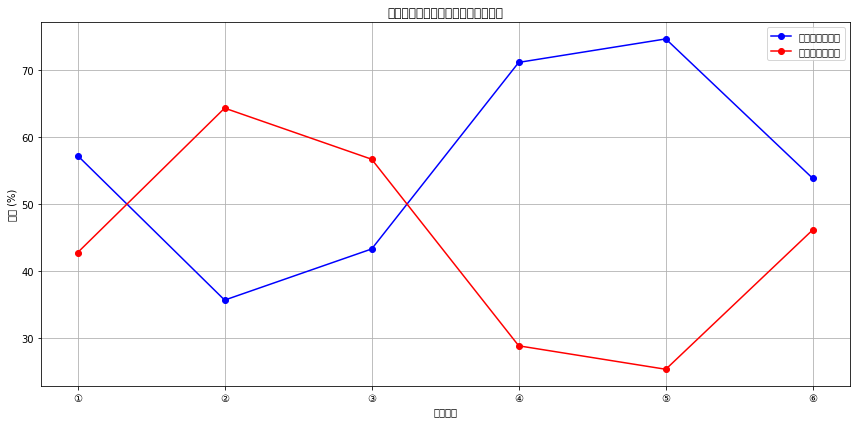

In [16]:
# 折れ線グラフを描画
plt.figure(figsize=(12, 6))

# 入庫日時範囲内と範囲外の割合を折れ線グラフでプロット
plt.plot(results['パターン'], results['入庫日時範囲内の割合(%)'], marker='o', label='入庫日時範囲内', color='b')
plt.plot(results['パターン'], results['入庫日時範囲外の割合(%)'], marker='o', label='入庫日時範囲外', color='r')

# タイトル、ラベル、凡例を設定
plt.title('各パターンにおける入庫日時の割合')
plt.xlabel('パターン')
plt.ylabel('割合 (%)')
plt.grid(True)
plt.legend()

# グラフを表示
plt.tight_layout()
plt.show()
